In [11]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
#import PyKDL as kdl
#import kdl_parser.kdl_parser_py.kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [9]:
path_to_urdf = "/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/" + "1" + "dof.urdf"

sim = pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")

#rbdlmodel = rbdl.loadModel("2dof.urdf")

In [12]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 

#def M_kdl_func():
#    for j in range(njoints):
#        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

#    kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)

#timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
#mintime_kdl[i] = min(timeit_kdl)
#mediantime_kdl[i] = median(timeit_kdl)
#averagetime_kdl[i] = average(timeit_kdl)

def M_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    M_u2c(q_none)
    
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    #print q
    H = pb.calculateMassMatrix(pbmodel, q_none)
    
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)



In [13]:
#pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("pantilt.urdf")
sim = pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
ndofs = 16
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)

#storage for timing data
mediantime_kdl = [None]*ndofs
mediantime_u2c = [None]*ndofs
mediantime_rbdl = [None]*ndofs
mediantime_pb = [None]*ndofs
mintime_kdl = [None]*ndofs
mintime_u2c = [None]*ndofs
mintime_rbdl = [None]*ndofs
mintime_pb = [None]*ndofs
averagetime_kdl = [None]*ndofs
averagetime_u2c = [None]*ndofs
averagetime_rbdl = [None]*ndofs
averagetime_pb = [None]*ndofs

nitr = 50000
nrepeat = 10
    
for i in range(ndofs):    
    print i
    #path_to_urdf = "/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/" + str(urdf_nr[i]) + "dof.urdf"
    path_to_urdf = str(urdf_nr[i]) + "dof.urdf"
    end_link = "link" + str(urdf_nr[i])
    root = 'base_link'
    tip = end_link
    
    #ok, kdl_tree = kdlurdf.treeFromFile(path_to_urdf)
    #kdlmodel = kdl_tree.getChain(root,tip)
    
    rbdlmodel = rbdl.loadModel(path_to_urdf)
    pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
    asd = u2c.URDFparser()
    robot_desc = asd.from_file(path_to_urdf)
    
    jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
    njoints = len(jlist)

    #g_kdl = kdl.Vector()
    #M_kdl = kdl.JntSpaceInertiaMatrix(njoints)
    M_rbdl = (rbdlmodel.q_size, rbdlmodel.q_size)
    M_rbdl = np.zeros(M_rbdl)

    #q_kdl = kdl.JntArray(njoints)
    q_np = np.zeros(njoints)
    q_none = [None]*njoints

    
    M_u2c = asd.get_jointspace_inertia_matrix(root, tip)
    timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)
    mintime_u2c[i] = min(timeit_u2c)
    mediantime_u2c[i] = median(timeit_u2c)
    averagetime_u2c[i] = average(timeit_u2c)
    
    timeit_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
    mintime_pb[i] = min(timeit_pb)
    mediantime_pb[i] = median(timeit_pb)
    averagetime_pb[i] = average(timeit_pb)
    
    timeit_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
    mintime_rbdl[i] = min(timeit_rbdl)
    mediantime_rbdl[i] = median(timeit_rbdl)
    averagetime_rbdl[i] = average(timeit_rbdl)


    
    

0
1dof.urdf
1
2dof.urdf
2
3dof.urdf
3
4dof.urdf
4
5dof.urdf
5
6dof.urdf
6
7dof.urdf
7
8dof.urdf
8
9dof.urdf
9
10dof.urdf
10
11dof.urdf
11
12dof.urdf
12
13dof.urdf
13
14dof.urdf
14
15dof.urdf
15
16dof.urdf


In [14]:
print mintime_u2c
print mintime_rbdl
print mintime_pb

[0.25032901763916016, 0.3043029308319092, 0.333050012588501, 0.3780210018157959, 0.40027689933776855, 0.4280850887298584, 0.46983909606933594, 0.5072081089019775, 0.535254955291748, 0.561406135559082, 0.5922679901123047, 0.6597208976745605, 0.6985359191894531, 0.7257678508758545, 0.7619850635528564, 0.8108890056610107]
[0.07905697822570801, 0.1152651309967041, 0.15058302879333496, 0.18614697456359863, 0.22207093238830566, 0.26049184799194336, 0.3014030456542969, 0.34247684478759766, 0.38294100761413574, 0.4231588840484619, 0.47104716300964355, 0.5125448703765869, 0.5589759349822998, 0.5989930629730225, 0.6533281803131104, 0.7078638076782227]
[0.13497686386108398, 0.1558530330657959, 0.17677807807922363, 0.20005202293395996, 0.2189629077911377, 0.24219489097595215, 0.2668008804321289, 0.2912909984588623, 0.3130769729614258, 0.33629298210144043, 0.35681700706481934, 0.3796870708465576, 0.40479207038879395, 0.42766904830932617, 0.44684600830078125, 0.4813868999481201]


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


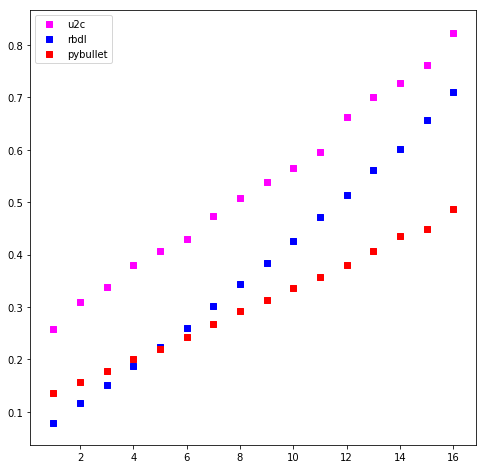

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (8, 8))
#plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
med_fig.show()

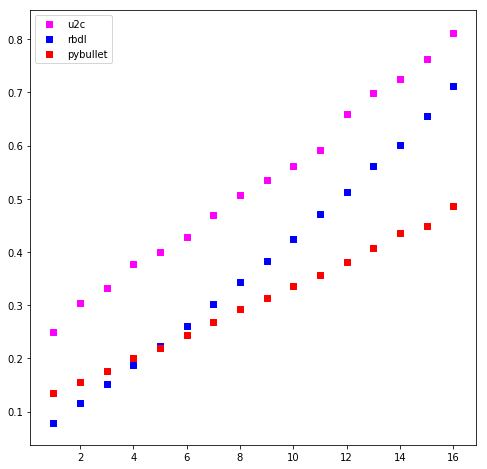

In [17]:
#joint_nr = list(range(ndofs + 1))
#joint_nr.pop(0)
min_fig = plt.figure(figsize = (8, 8))
#plt.scatter(joint_nr, mintime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mintime_u2c, c='fuchsia', marker='s', label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
min_fig.show()


[Text(0,0,'RBDL'), Text(0,0,'U2C'), Text(0,0,'pybullet')]

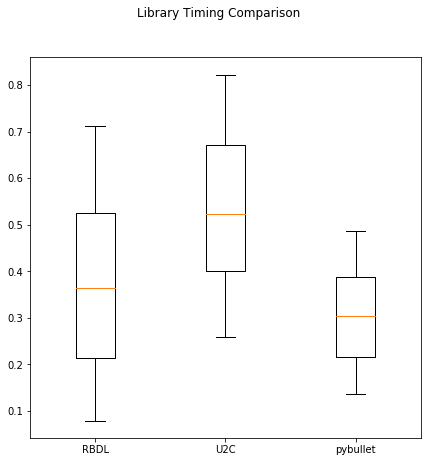

In [18]:
timing_scores = [mediantime_rbdl, mediantime_u2c, mediantime_pb]
names = ["RBDL", "U2C", "pybullet"]#, "RBDL", "pybullet"]
boxplot = plt.figure(figsize = (7, 7))
boxplot.suptitle("Library Timing Comparison")
ax = boxplot.add_subplot(111)
ax.boxplot(timing_scores)
#plt.boxplot(timing_scores)
ax.set_xticklabels(names)


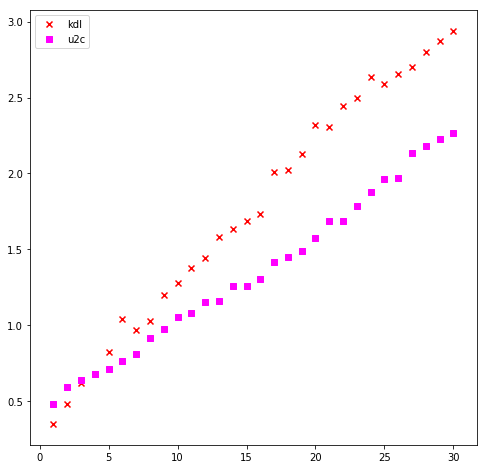

In [9]:
av_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, averagetime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, averagetime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
av_fig.show()


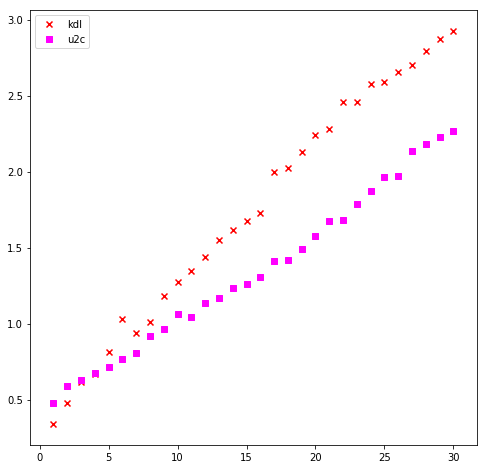

In [11]:
median_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
median_fig.show()

[0 1]


([<matplotlib.axis.XTick at 0x7fdc3c3aa050>,
 <a list of 2 Text xticklabel objects>)

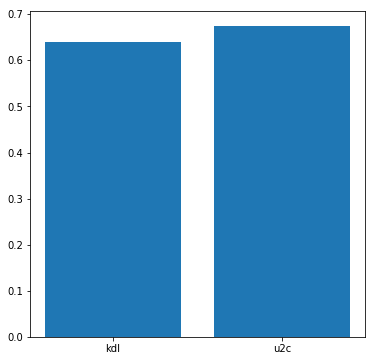

In [16]:
hist = plt.figure(figsize = (6, 6))
x = np.arange(2)
print x
plt.bar(x, height= [mintime_kdl[3], mintime_u2c[3]])
plt.xticks(x, ['kdl','u2c'])

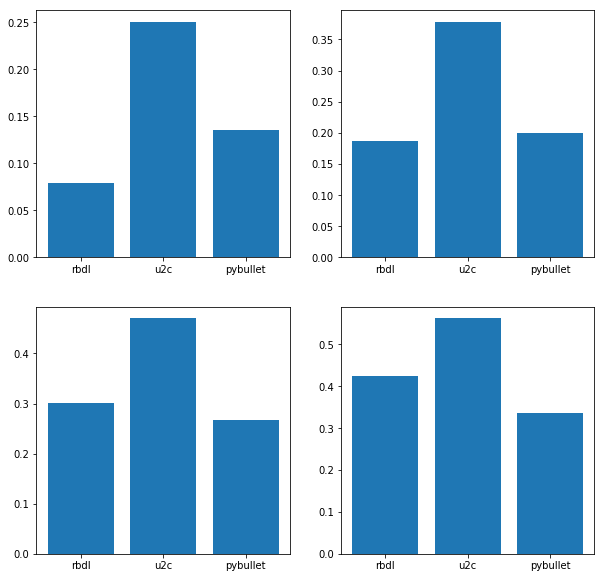

In [19]:
fig = plt.figure(figsize = (10, 10))
nplots = 5
x = np.arange(3)
j = 0
for i in range(1, nplots):
    plt.subplot(2, 2, i)
    plt.bar(x, height= [mintime_rbdl[j], mintime_u2c[j], mintime_pb[j]])
    plt.xticks(x, ['rbdl','u2c', 'pybullet'])
    j += 3

plt.show()

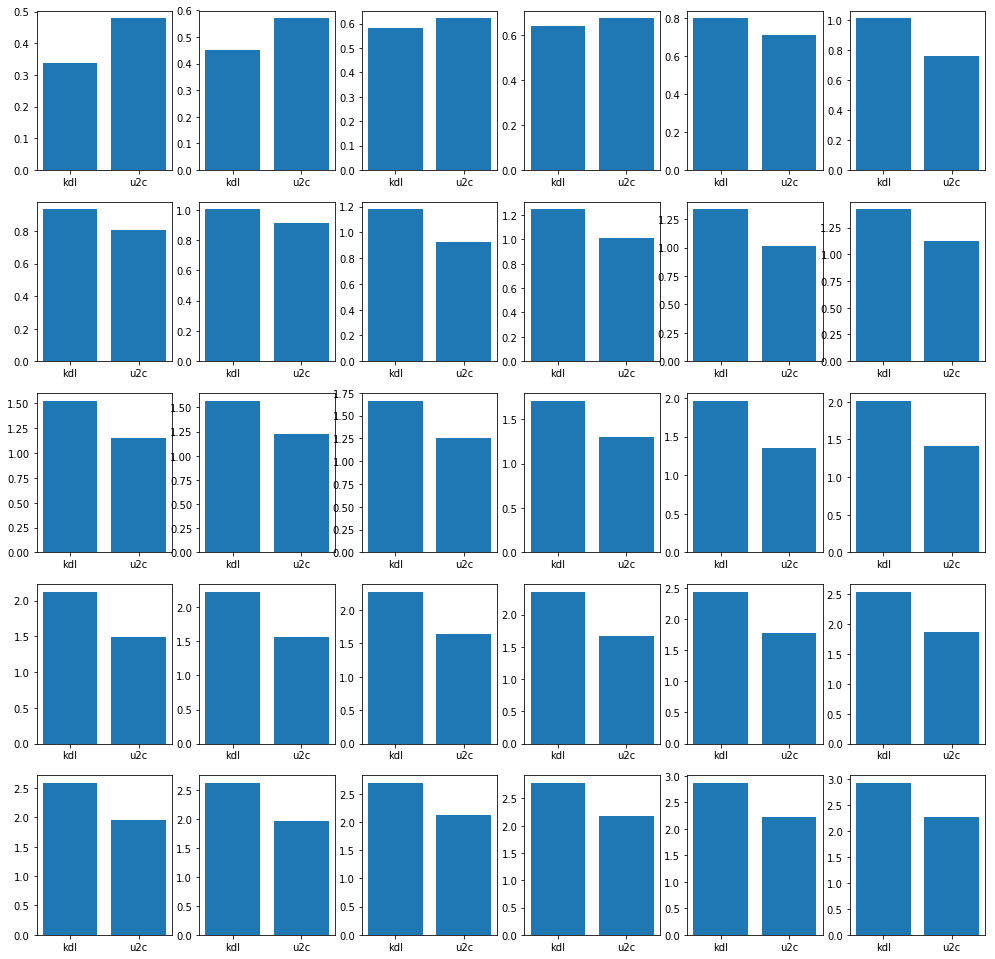

In [33]:
fig = plt.figure(figsize = (17, 17))
nplots = 31
j = 0
for i in range(1, nplots):
    plt.subplot(5, 6, i)
    plt.bar(x, height= [mintime_kdl[j], mintime_u2c[j]])
    plt.xticks(x, ['kdl','u2c'])
    j += 1

plt.show()

In [8]:
#kjoere alt og lagre data:

def M_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)

timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
mintime_kdl[njoints-1] = min(timeit_kdl)
mediantime_kdl[njoints-1] = median(timeit_kdl)
averagetime_kdl[njoints-1] = average(timeit_kdl)
#print median(timeit_kdl)
#print average(timeit_kdl)
#print timeit_kdl
#print min(timeit_kdl)
#print max(timeit_kdl)

In [9]:
M_u2c = asd.get_jointspace_inertia_matrix(root, tip)
def M_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    M_u2c(q_none)

timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)

mintime_u2c[njoints-1] = min(timeit_u2c)
mediantime_u2c[njoints-1] = median(timeit_u2c)
averagetime_u2c[njoints-1] = average(timeit_u2c)
#print median(timeit_u2c)
#print average(timeit_u2c)
#print timeit_u2c
#print min(timeit_u2c)
#print max(timeit_u2c)

In [10]:
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)
timeit_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
mintime_rbdl[njoints-1] = min(timeit_rbdl)
mediantime_rbdl[njoints-1] = median(timeit_rbdl)
averagetime_rbdl[njoints-1] = average(timeit_rbdl)
print median(timeit_rbdl)
print average(timeit_rbdl)
print timeit_rbdl
print min(timeit_rbdl)
print max(timeit_rbdl)

NameError: global name 'rbdlmodel' is not defined

In [ ]:
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    #print q
    H = pb.calculateMassMatrix(pbmodel, q_none)
timeit_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
mintime_pb[njoints-1] = min(timeit_pb)
mediantime_pb[njoints-1] = median(timeit_pb)
averagetime_pb[njoints-1] = average(timeit_pb)
print median(timeit_pb)
print average(timeit_pb)
print timeit_pb
print min(timeit_pb)
print max(timeit_pb)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(njoints + 1))
joint_nr.pop(0)
plt.scatter(joint_nr, mediantime_kdl, c='peachpuff', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
plt.show()